# Charger les bibliothèques


In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'1.14.0'

In [3]:
from tensorflow import keras

In [4]:
keras.__version__

'2.2.4-tf'

In [5]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.4MB 13.2MB/s ta 0:00:01
  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


In [6]:
!pip install joblib

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
     |████████████████████████████████| 296kB 26.2MB/s eta 0:00:01


In [7]:
!pip install pathlib

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
     |████████████████████████████████| 51kB 9.5MB/s  eta 0:00:01
  Created wheel for pathlib: filename=pathlib-1.0.1-cp27-none-any.whl size=13524 sha256=1e1b0798230d7a7d9bfdab7f86726351f241b04acde9f6b483f1b77b395079f0
  Stored in directory: /home/ec2-user/.cache/pip/wheels/f9/b2/4a/68efdfe5093638a9918bd1bb734af625526e849487200aa171
Successfully built pathlib


In [8]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import joblib

import time

import pathlib


Using TensorFlow backend.


# Importer les données

In [9]:
#%cd /content/gdrive/My\ Drive/Colab\ Notebooks/best_breeds_redim
#%cd Data/redim/
%cd redim_download

/home/ec2-user/SageMaker/redim_download


In [9]:
!unzip -o best_breeds_redim.zip

Archive:  best_breeds_redim.zip
   creating: best_breeds_redim/test/
   creating: best_breeds_redim/test/n02113799-standard_poodle/
  inflating: best_breeds_redim/test/n02113799-standard_poodle/n02113799_1183.jpg  
  inflating: best_breeds_redim/test/n02113799-standard_poodle/n02113799_1395.jpg  
  inflating: best_breeds_redim/test/n02113799-standard_poodle/n02113799_1518.jpg  
  inflating: best_breeds_redim/test/n02113799-standard_poodle/n02113799_1728.jpg  
  inflating: best_breeds_redim/test/n02113799-standard_poodle/n02113799_2096.jpg  
  inflating: best_breeds_redim/test/n02113799-standard_poodle/n02113799_2292.jpg  
  inflating: best_breeds_redim/test/n02113799-standard_poodle/n02113799_2401.jpg  
  inflating: best_breeds_redim/test/n02113799-standard_poodle/n02113799_2600.jpg  
  inflating: best_breeds_redim/test/n02113799-standard_poodle/n02113799_273.jpg  
  inflating: best_breeds_redim/test/n02113799-standard_poodle/n02113799_298.jpg  
  inflating: best_breeds_redim/test/n021

  inflating: best_breeds_redim/train/n02115641-dingo/n02115641_6579.jpg  
  inflating: best_breeds_redim/train/n02115641-dingo/n02115641_6627.jpg  
  inflating: best_breeds_redim/train/n02115641-dingo/n02115641_670.jpg  
  inflating: best_breeds_redim/train/n02115641-dingo/n02115641_6707.jpg  
  inflating: best_breeds_redim/train/n02115641-dingo/n02115641_6716.jpg  
  inflating: best_breeds_redim/train/n02115641-dingo/n02115641_6772.jpg  
  inflating: best_breeds_redim/train/n02115641-dingo/n02115641_6844.jpg  
  inflating: best_breeds_redim/train/n02115641-dingo/n02115641_6974.jpg  
  inflating: best_breeds_redim/train/n02115641-dingo/n02115641_7071.jpg  
  inflating: best_breeds_redim/train/n02115641-dingo/n02115641_7106.jpg  
  inflating: best_breeds_redim/train/n02115641-dingo/n02115641_7119.jpg  
  inflating: best_breeds_redim/train/n02115641-dingo/n02115641_7158.jpg  
  inflating: best_breeds_redim/train/n02115641-dingo/n02115641_7181.jpg  
  inflating: best_breeds_redim/train/n0

  inflating: best_breeds_redim/valid/n02116738-African_hunting_dog/n02116738_4138.jpg  
  inflating: best_breeds_redim/valid/n02116738-African_hunting_dog/n02116738_4508.jpg  
  inflating: best_breeds_redim/valid/n02116738-African_hunting_dog/n02116738_4720.jpg  
  inflating: best_breeds_redim/valid/n02116738-African_hunting_dog/n02116738_4834.jpg  
  inflating: best_breeds_redim/valid/n02116738-African_hunting_dog/n02116738_500.jpg  
  inflating: best_breeds_redim/valid/n02116738-African_hunting_dog/n02116738_5338.jpg  
  inflating: best_breeds_redim/valid/n02116738-African_hunting_dog/n02116738_5683.jpg  
  inflating: best_breeds_redim/valid/n02116738-African_hunting_dog/n02116738_607.jpg  


In [10]:
# Create paths to data
train_data_dir = pathlib.Path('train')
test_data_dir = pathlib.Path('test')
valid_data_dir = pathlib.Path('valid')

In [11]:
# Obtain class names
CLASS_NAMES = np.array([item.name for item in train_data_dir.glob('*') if item.name != "LICENSE.txt"])

In [12]:
# Check the data size
train_size = len(list(train_data_dir.glob('*/*.jpg')))
valid_size = len(list(valid_data_dir.glob('*/*.jpg')))
test_size = len(list(test_data_dir.glob('*/*.jpg')))
print("Number of train photos : " + str(train_size))
print("Number of validation photos : " + str(valid_size))
print("Number of test photos : " + str(test_size))

Number of train photos : 12000
Number of validation photos : 2880
Number of test photos : 5700


# Créer les générateurs

In [13]:
batch_size = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [14]:
# Fit the generator including data augmentation
train_generator = ImageDataGenerator(rescale=1./255, 
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2, 
                                     horizontal_flip=True,
                                     rotation_range=20, 
                                     brightness_range= [0.5, 1.2])

In [15]:
# Create the train generator from directory
train_data_gen = train_generator.flow_from_directory(directory=str(train_data_dir),
                                                     seed=23,
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES), 
                                                     class_mode="sparse"
                                                     )

Found 12000 images belonging to 120 classes.


In [16]:
# Create the test generator - no data augmentation but convert the data from uint8 to float32 in range [0,1].
test_generator = ImageDataGenerator(rescale=1./255)

In [17]:
# Create the valid generator from directory
valid_data_gen = test_generator.flow_from_directory(directory=str(valid_data_dir),
                                                     seed=23,
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES),
                                                     class_mode="sparse"
                                                     )

Found 2880 images belonging to 120 classes.


In [18]:
# Create the test generator from directory
test_data_gen = test_generator.flow_from_directory(directory=str(test_data_dir),
                                                     seed=23,
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES),
                                                     class_mode="sparse")

Found 5700 images belonging to 120 classes.


# Modèle CNN from scratch

Nous allons  excétuter le modèle la plus performant en termes de précision. Cette fois ci, nous augmentons le nombre d'epochs à 40 pour pouvoir observer l'évolution d'apprentissage. 

Nous ajoutons le callback earlystopping afin d'arrêter l'apprentissage s'il n'y a plus d'évolution.

In [19]:
my_CNN = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same", strides=2, input_shape=[224, 224, 3]), 
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same", strides=1), 
    keras.layers.Conv2D(128, 3, activation="relu", padding="same", strides=1),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same", strides=1),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same", strides=1),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),    
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(120, activation="softmax")
])
my_CNN.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 64)      9472      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       295168    
____

In [20]:
# Compile the modele 
my_CNN.compile(optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Checkpoint_cb : save the best model
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_CNN4.h5", save_best_only=True)

# Early stopping : stop the execution if the model do not improve the performance for 5 epochs                                
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, 
                                                 restore_best_weights=True)

In [22]:
# Measure the time of execution
start_time = time.time()

# Set epochs
epochs = 40

# Train the model
history1 = my_CNN.fit_generator(
    train_data_gen,
    validation_data=valid_data_gen, 
    steps_per_epoch=np.ceil(train_size/batch_size),
    validation_steps=np.ceil(valid_size/batch_size),
    epochs=epochs, 
    callbacks=[checkpoint_cb, early_stopping_cb], 
    verbose=1)

# Print the time of execution
print("--- " + str(int((time.time() - start_time)//3600)) + " hours " 
      + str(int(((time.time() - start_time)%3600)//60)) + " mins ---")

Epoch 1/40
375/375 [==============================] - 172s 459ms/step - loss: 4.7877 - acc: 0.0070 - val_loss: 4.7878 - val_acc: 0.0080
Epoch 2/40
375/375 [==============================] - 170s 454ms/step - loss: 4.7875 - acc: 0.0081 - val_loss: 4.7875 - val_acc: 0.0087
Epoch 3/40
375/375 [==============================] - 170s 452ms/step - loss: 4.7874 - acc: 0.0095 - val_loss: 4.7872 - val_acc: 0.0094
Epoch 4/40
375/375 [==============================] - 170s 453ms/step - loss: 4.7872 - acc: 0.0101 - val_loss: 4.7871 - val_acc: 0.0073
Epoch 5/40
375/375 [==============================] - 169s 451ms/step - loss: 4.7872 - acc: 0.0090 - val_loss: 4.7869 - val_acc: 0.0097
Epoch 6/40
375/375 [==============================] - 172s 459ms/step - loss: 4.7872 - acc: 0.0079 - val_loss: 4.7868 - val_acc: 0.0108
Epoch 7/40
375/375 [==============================] - 170s 454ms/step - loss: 4.7868 - acc: 0.0095 - val_loss: 4.7868 - val_acc: 0.0097
Epoch 8/40
375/375 [============================

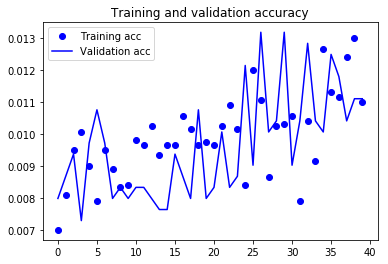

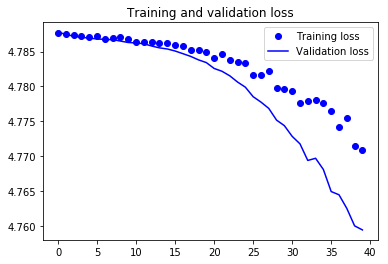

In [24]:
#Plot the training & validation loss & accuracy
import matplotlib.pyplot as plt

acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
# Evaluate the model on test data
my_CNN.load_weights('my_CNN4.h5')

my_CNN.evaluate(test_data_gen)

179/179 [==============================] - 11s 64ms/step - loss: 4.7570 - acc: 0.0079


[4.756963591335872, 0.007894737]

# Transfer learning

## Fine-tuning partiel

Nous avons testés deux modèles - ResNet50 et Xception dans l'environnement GPU de Google colab sur un échantillon de 5 races de chien. Le modèle qui performe le mieux en termes de précision et qui en même temps n'a pas de tendance de surapprendre est le modèle Xception avec fine-tuning partiel de 7 premières couches qui correspondent au block 1 (voir le notebook Projet6_echantillon).

Nous allons donc utiliser ce modèle pour l'exécuter sur le jeu de données complète.

### Paramètrage de modèle

In [27]:
n_classes = 120
base_model = keras.applications.xception.Xception(weights="imagenet", 
                                                  include_top=False)
base_model.summary()

83697664/83683744 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________

In [28]:
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
xception = keras.Model(inputs=base_model.input, outputs=output)

In [29]:
# Ne pas entraîner les 7 premières couches (les plus basses) : qui correspondent au block 1
for layer in xception.layers[:7]:
    layer.trainable = False

In [30]:
# Compile the modele 
xception.compile(optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Création de générateurs de données

In [31]:
batch_size = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [32]:
# Fit the generator including data augmentation
train_generator = ImageDataGenerator(rescale=1./255, 
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2, 
                                     horizontal_flip=True,
                                     rotation_range=20, 
                                     brightness_range= [0.5, 1.2])

In [33]:
# Generator for train data
train_data_gen = train_generator.flow_from_directory(directory=str(train_data_dir),
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES),
                                                     class_mode="sparse"
                                                     )

Found 12000 images belonging to 120 classes.


In [34]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].
test_generator = ImageDataGenerator(rescale=1./255)

In [35]:
valid_data_gen = test_generator.flow_from_directory(directory=str(valid_data_dir),
                                                     seed=23,
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES),
                                                     class_mode="sparse"
                                                     )

Found 2880 images belonging to 120 classes.


In [36]:
test_data_gen = test_generator.flow_from_directory(directory=str(test_data_dir),
                                                     seed=23,
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES),
                                                     class_mode="sparse")

Found 5700 images belonging to 120 classes.


### Exécution n#1 : Test 1 epoch

In [37]:
# Checkpoint_cb : save the best model
checkpoint_cb = keras.callbacks.ModelCheckpoint("xception.h5", save_best_only=True)

# Early stopping : stop the execution if the model do not improve the performance for 5 epochs                                
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, 
                                                 restore_best_weights=True)

In [34]:
# Measure the time of execution
start_time = time.time()

# Set epochs => Only 1 epoch to test the time of execution
epochs = 1


# Train the model
xception.fit_generator(
    train_data_gen,
    validation_data=valid_data_gen, 
    steps_per_epoch=np.ceil(train_size/batch_size),
    validation_steps=np.ceil(valid_size/batch_size),
    epochs=epochs, 
    callbacks=[checkpoint_cb, tensorboard_cb], 
    verbose=1)

# Print the time of execution
print("--- " + str(int((time.time() - start_time)//3600)) + " hours " 
      + str(int(((time.time() - start_time)%3600)//60)) + " mins ---")

400/400 [==============================] - 236s 589ms/step - loss: 4.7870 - acc: 0.0137 - val_loss: 4.7361 - val_acc: 0.0191
--- 0 hours 3 mins ---


In [35]:
# Evaluate the model on test data
xception.load_weights('xception1.h5')

xception.evaluate(test_data_gen)

190/190 [==============================] - 11s 58ms/step - loss: 4.7428 - acc: 0.0175


[4.742817780846043, 0.01754386]

### Exécution n#2 : 40 epochs

In [38]:
# Checkpoint_cb : save the best model
checkpoint_cb = keras.callbacks.ModelCheckpoint("xception2.h5", save_best_only=True)

# Early stopping : stop the execution if the model do not improve the performance for 5 epochs                                
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, 
                                                 restore_best_weights=True)

In [39]:
# Second execution 30e pochs

# Measure the time of execution
start_time = time.time()

# Set epochs 
epochs = 40


# Train the model
history2 = xception.fit_generator(
    train_data_gen,
    validation_data=valid_data_gen, 
    steps_per_epoch=np.ceil(train_size/batch_size),
    validation_steps=np.ceil(valid_size/batch_size),
    epochs=epochs, 
    callbacks=[checkpoint_cb, early_stopping_cb], 
    verbose=1)

# Print the time of execution
print("--- " + str(int((time.time() - start_time)//3600)) + " hours " 
      + str(int(((time.time() - start_time)%3600)//60)) + " mins ---")

Epoch 1/40
375/375 [==============================] - 201s 535ms/step - loss: 4.8037 - acc: 0.0104 - val_loss: 4.7533 - val_acc: 0.0160
Epoch 2/40
375/375 [==============================] - 180s 479ms/step - loss: 4.7329 - acc: 0.0190 - val_loss: 4.6719 - val_acc: 0.0344
Epoch 3/40
375/375 [==============================] - 180s 480ms/step - loss: 4.6463 - acc: 0.0393 - val_loss: 4.5530 - val_acc: 0.0743
Epoch 4/40
375/375 [==============================] - 179s 478ms/step - loss: 4.5301 - acc: 0.0784 - val_loss: 4.4077 - val_acc: 0.1472
Epoch 5/40
375/375 [==============================] - 179s 477ms/step - loss: 4.3864 - acc: 0.1577 - val_loss: 4.2318 - val_acc: 0.2608
Epoch 6/40
375/375 [==============================] - 180s 481ms/step - loss: 4.2138 - acc: 0.2659 - val_loss: 4.0215 - val_acc: 0.3861
Epoch 7/40
375/375 [==============================] - 178s 475ms/step - loss: 4.0152 - acc: 0.3740 - val_loss: 3.7829 - val_acc: 0.4819
Epoch 8/40
375/375 [============================

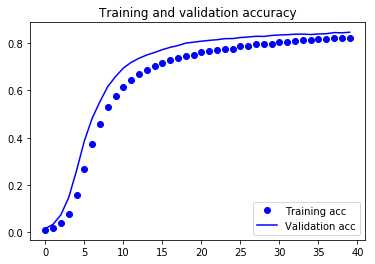

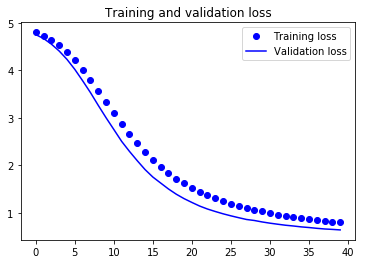

In [40]:
#Plot the training & validation loss & accuracy
import matplotlib.pyplot as plt

acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [41]:
# Evaluate the model on test data
xception.load_weights('xception2.h5')

xception.evaluate(test_data_gen)

179/179 [==============================] - 11s 59ms/step - loss: 0.6145 - acc: 0.8575


[0.6144738162363041, 0.8575439]

# Test de performance

In [11]:
#%cd /content/gdrive/My\ Drive/Colab\ Notebooks/best_breeds_redim
#%cd Data/redim/
%cd best_breeds_redim

/home/ec2-user/SageMaker/best_breeds_redim


In [12]:
train_data_dir = pathlib.Path('train')
test_data_dir = pathlib.Path('test')
valid_data_dir = pathlib.Path('valid')

In [13]:
# Calculate the data size
train_size = len(list(train_data_dir.glob('*/*.jpg')))
valid_size = len(list(valid_data_dir.glob('*/*.jpg')))
test_size = len(list(test_data_dir.glob('*/*.jpg')))
print("Number of train photos : " + str(train_size))
print("Number of validation photos : " + str(valid_size))
print("Number of test photos : " + str(test_size))

Number of train photos : 500
Number of validation photos : 125
Number of test photos : 164


In [14]:
# Obtain class names

CLASS_NAMES = np.array([item.name for item in train_data_dir.glob('*') if item.name != "LICENSE.txt"])

In [15]:
batch_size = 20
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [16]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].
train_generator = ImageDataGenerator(rescale=1./255)

In [17]:
train_data_gen = train_generator.flow_from_directory(directory=str(train_data_dir),
                                                     seed=23,
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES), 
                                                     class_mode="sparse"
                                                     )

Found 500 images belonging to 5 classes.


In [18]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].
test_generator = ImageDataGenerator(rescale=1./255)

In [19]:
valid_data_gen = test_generator.flow_from_directory(directory=str(valid_data_dir),
                                                     seed=23,
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES),
                                                     class_mode="sparse"
                                                     )

Found 125 images belonging to 5 classes.


In [20]:
my_CNN1 = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same", strides=2, input_shape=[224, 224, 3]), 
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same", strides=2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same", strides=2),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same", strides=1),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same", strides=1),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(5, activation="softmax")
])
my_CNN1.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 64)      9472      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
____

In [23]:
# Compile the modele 
my_CNN1.compile(optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9), 
                loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
# Measure the time of execution
start_time = time.time()

# Set epochs
epochs = 10

# Train the model
my_CNN1.fit_generator(
    train_data_gen,
    validation_data=valid_data_gen, 
    steps_per_epoch=np.ceil(train_size/batch_size),
    validation_steps=np.ceil(valid_size/batch_size),
    epochs=epochs, 
    #callbacks=[checkpoint_cb, tensorboard_cb], 
    verbose=1)

# Print the time of execution
print("--- " + str(int(time.time() - start_time)) + " sec ") 


Epoch 1/10
25/25 [==============================] - 2s 74ms/step - loss: 1.6065 - acc: 0.2480 - val_loss: 1.6064 - val_acc: 0.2083
Epoch 2/10
25/25 [==============================] - 1s 44ms/step - loss: 1.6063 - acc: 0.2440 - val_loss: 1.6062 - val_acc: 0.2083
Epoch 3/10
25/25 [==============================] - 1s 38ms/step - loss: 1.6061 - acc: 0.2380 - val_loss: 1.6059 - val_acc: 0.2083
Epoch 4/10
25/25 [==============================] - 1s 41ms/step - loss: 1.6058 - acc: 0.2400 - val_loss: 1.6057 - val_acc: 0.2167
Epoch 5/10
25/25 [==============================] - 1s 44ms/step - loss: 1.6055 - acc: 0.2380 - val_loss: 1.6055 - val_acc: 0.2500
Epoch 6/10
25/25 [==============================] - 1s 38ms/step - loss: 1.6053 - acc: 0.2360 - val_loss: 1.6052 - val_acc: 0.2667
Epoch 7/10
25/25 [==============================] - 1s 47ms/step - loss: 1.6050 - acc: 0.2460 - val_loss: 1.6050 - val_acc: 0.2667
Epoch 8/10
25/25 [==============================] - 1s 38ms/step - loss: 1.6047 - a